<a href="https://colab.research.google.com/github/keerthana-narra/instacart/blob/main/Instacart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## Importing libraries and loading data

In [ ]:
### Imports
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Set seaborn color palette
colors = sns.color_palette("pastel")

%matplotlib inline


In [ ]:
df_aisles = pd.read_csv("/content/drive/MyDrive/Almabetter/Cohort Nilgiri/Kaggle/aisles.csv")
df_departments = pd.read_csv("/content/drive/MyDrive/Almabetter/Cohort Nilgiri/Kaggle/departments.csv")
df_products = pd.read_csv("/content/drive/MyDrive/Almabetter/Cohort Nilgiri/Kaggle/products.csv")
df_order_products_prior = pd.read_csv("/content/drive/MyDrive/Almabetter/Cohort Nilgiri/Kaggle/order_products__prior.csv")
df_order_products_train = pd.read_csv("/content/drive/MyDrive/Almabetter/Cohort Nilgiri/Kaggle/order_products__train.csv")
df_order_products_test = pd.read_csv('/content/drive/MyDrive/Almabetter/Cohort Nilgiri/Kaggle/sample_submission.csv')
df_orders = pd.read_csv("/content/drive/MyDrive/Almabetter/Cohort Nilgiri/Kaggle/orders.csv")



## Peeking into data frames

In [ ]:
# Peeking into dataframes
print('Total aisles: {}'.format(df_aisles.shape[0]))
df_aisles.head()

Total aisles: 134


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [ ]:
print('Total departments: {}'.format(df_departments.shape[0]))
df_departments.head()


Total departments: 21


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [ ]:
print('Total products: {}'.format(df_products.shape[0]))
df_products.head()


Total products: 49688


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [ ]:
print('Total ordered products (prior): {}'.format(df_order_products_prior.shape[0]))
df_order_products_prior.head()


Total ordered products (prior): 32434489


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [ ]:
print('Total ordered products (train): {}'.format(df_order_products_train.shape[0]))
df_order_products_train.head()


Total ordered products (train): 1384617


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [ ]:
print('Orders(test): {}'.format(df_order_products_test.shape[0]))
df_order_products_test.head()


Orders(test): 75000


,order_id,products
0,17,39276 29259
1,34,39276 29259
2,137,39276 29259
3,182,39276 29259
4,257,39276 29259


In [ ]:

print('Total orders: {}'.format(df_orders.shape[0]))
df_orders.head()


Total orders: 3421083


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [ ]:
df_orders.describe()


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.214874e+06
mean,1.710542e+06,1.029782e+05,1.715486e+01,2.776219e+00,1.345202e+01,1.111484e+01
std,9.875817e+05,5.953372e+04,1.773316e+01,2.046829e+00,4.226088e+00,9.206737e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.552715e+05,5.139400e+04,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00
50%,1.710542e+06,1.026890e+05,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00
75%,2.565812e+06,1.543850e+05,2.300000e+01,5.000000e+00,1.600000e+01,1.500000e+01
max,3.421083e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01


In [ ]:
# User split into train and test
df_orders.groupby("eval_set").nunique().user_id.reset_index()



,eval_set,user_id
0,prior,206209
1,test,75000
2,train,131209


## EDA

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


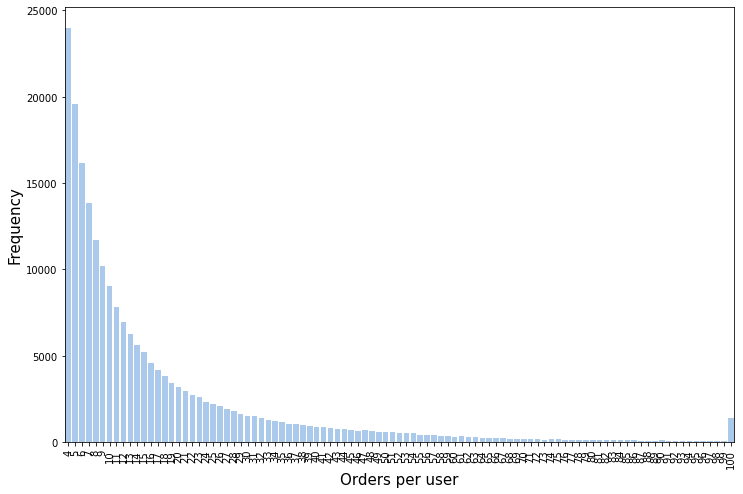

In [ ]:
user_order_count = df_orders.groupby("user_id")["order_number"].aggregate(max).reset_index().order_number.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(user_order_count.index, user_order_count.values, color=colors[0])
plt.ylabel("Frequency", fontsize=15)
# Add title
plt.xticks(rotation="vertical")
plt.xlabel("Orders per user", fontsize=15)
plt.show()


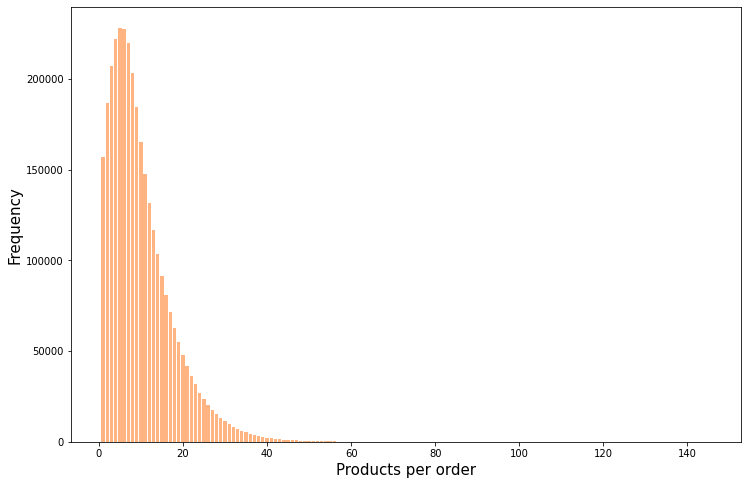

In [ ]:
# Prior set
order_product_count = df_order_products_prior.groupby("order_id")["add_to_cart_order"].aggregate(max).reset_index().add_to_cart_order.value_counts()

plt.figure(figsize=(12,8))
plt.bar(order_product_count.index, order_product_count.values, color=colors[1])
plt.ylabel('Frequency', fontsize=15)
# Add title
plt.xlabel('Products per order', fontsize=15)
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


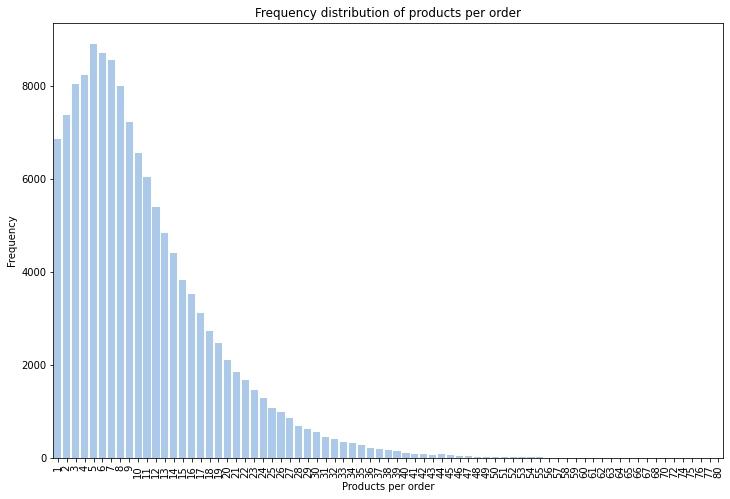

In [ ]:
# Train set
order_product_count = df_order_products_train.groupby("order_id")["add_to_cart_order"].aggregate(max).reset_index().add_to_cart_order.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(order_product_count.index, order_product_count.values, color=colors[0])
plt.ylabel('Frequency')
plt.xticks(rotation="vertical")
plt.title("Frequency distribution of products per order")
plt.xlabel('Products per order')
plt.show()


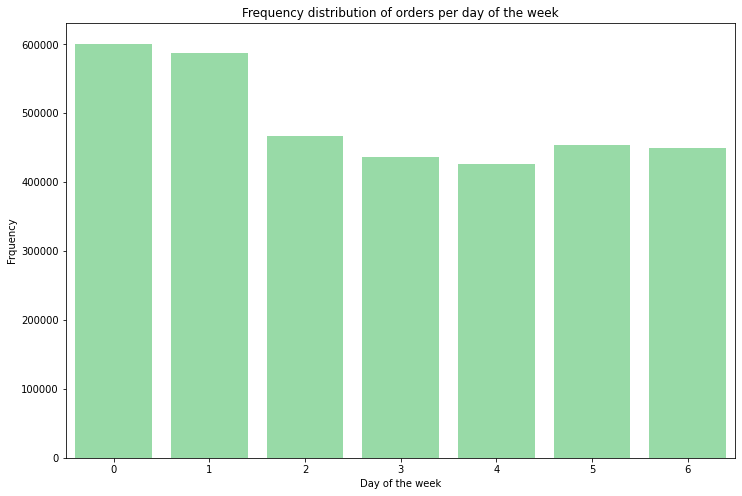

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_dow", data=df_orders, color=colors[2])
plt.ylabel("Frquency")
plt.xlabel("Day of the week")
plt.title("Frequency distribution of orders per day of the week")
plt.show()


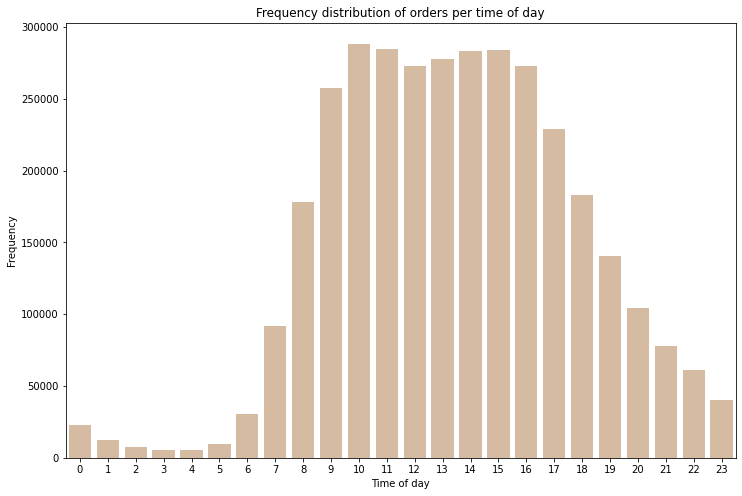

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day", data=df_orders, color=colors[5])
plt.ylabel("Frequency")
plt.xlabel("Time of day")
plt.title("Frequency distribution of orders per time of day")
plt.show()


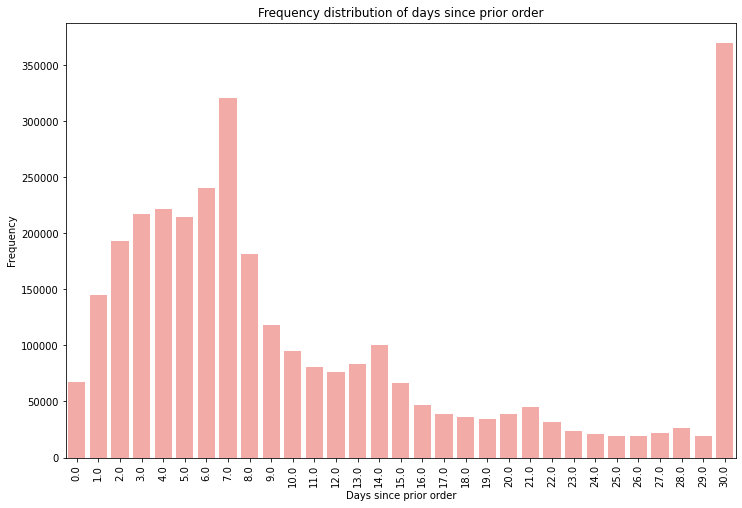

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x="days_since_prior_order", data=df_orders, color=colors[3])
plt.ylabel("Frequency")
plt.xlabel('Days since prior order')
plt.xticks(rotation="vertical")
plt.title("Frequency distribution of days since prior order")
plt.show()


In [ ]:
# Merge Prior orders, Product, Aisle and Department 
df_order_products_prior_merged = pd.merge(
                                    pd.merge(pd.merge(df_order_products_prior, df_products, on="product_id", how="left"), 
                                        df_aisles, 
                                        on="aisle_id", 
                                        how="left"), 
                                    df_departments, 
                                    on="department_id", 
                                    how="left")


In [ ]:
df_order_products_prior_merged.head()


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


In [ ]:
# N = Top X

N = 20


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


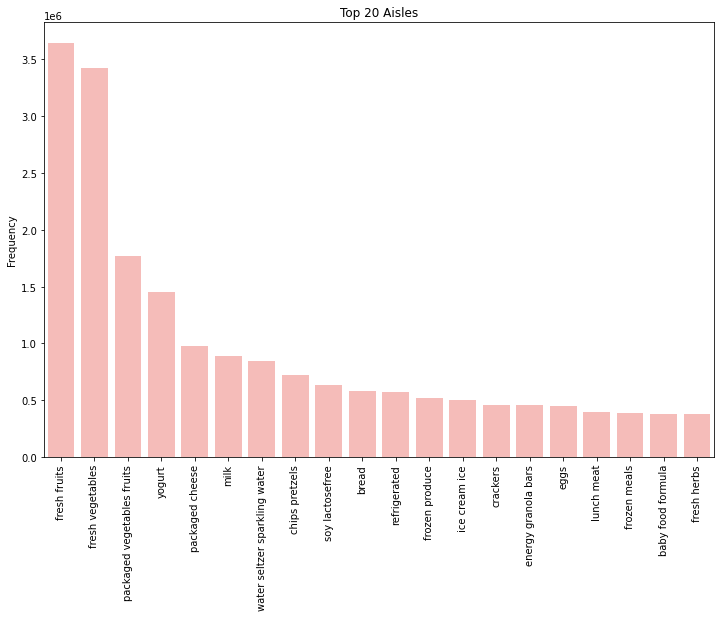

In [ ]:
# Top N Aisles
top_aisles = df_order_products_prior_merged["aisle"].value_counts().head(N)

plt.figure(figsize=(12,8))
sns.barplot(top_aisles.index, top_aisles.values, alpha=0.8, color=colors[3])
plt.ylabel("Frequency")
plt.xticks(rotation="vertical")
plt.title('Top {} Aisles'.format(N))
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


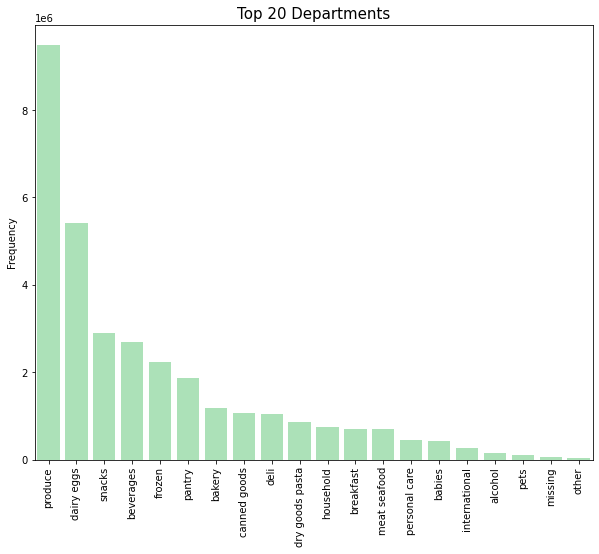

In [ ]:
# Top N Departments
top_departments = df_order_products_prior_merged["department"].value_counts().head(N)

plt.figure(figsize=(10,8))
sns.barplot(top_departments.index, top_departments.values, alpha=0.8, color=colors[2])
plt.ylabel('Frequency')
plt.xticks(rotation="vertical")
plt.title('Top {} Departments'.format(N), fontsize=15)
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


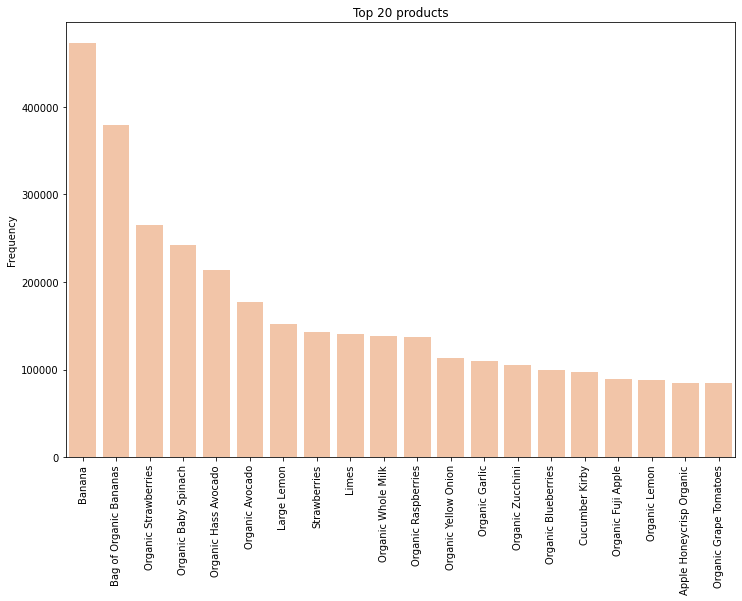

In [ ]:
# Top N products by frequency
top_products = df_order_products_prior_merged["product_name"].value_counts().head(N)

plt.figure(figsize=(12,8))
sns.barplot(top_products.index, top_products.values, alpha=0.8, color=colors[1])
plt.ylabel('Frequency')
plt.xticks(rotation="vertical")
plt.title('Top {} products'.format(N))
plt.show()


## W

In [ ]:
!pip install implicit

     |████████████████████████████████| 1.1MB 2.9MB/s 
  Created wheel for implicit: filename=implicit-0.4.4-cp37-cp37m-linux_x86_64.whl size=3406382 sha256=76385e9cc7799c2762be6c6a18f450aa90fc8614722aa0a837366e570fd3789c
  Stored in directory: /root/.cache/pip/wheels/bf/d4/ec/fd4f622fcbefb7521f149905295b2c26adecb23af38aa28217
Successfully built implicit


In [ ]:

from implicit.nearest_neighbours import tfidf_weight
from scipy.sparse import coo_matrix, csr_matrix
from sklearn.metrics.pairwise import cosine_similarity
from datetime import datetime
from pathlib import Path
from numpy import bincount, log, sqrt

import scipy.sparse as sparse
import implicit
import pickle
import time
import heapq

In [ ]:
### Helper Functions

def sparsity(matrix):
    """
    Given a matrix, returns its sparsity
    """
    total_size = matrix.shape[0] * matrix.shape[1]
    actual_size = matrix.size
    sparsity = (1 - (actual_size / total_size)) * 100
    return(sparsity)
    


def get_k_popular(k, df_merged_order_products_prior):
    """
    Returns the `k` most popular products based on purchase count in the dataset
    """
    popular_products = list(df_merged_order_products_prior["product_id"].value_counts().head(k).index)
    return popular_products


def make_prior_data():
    """
    Generates the prior dataset including prior_user_products and product_frequency
    """
    # Read prior order csv
    df_order_products_prior = pd.read_csv("/content/drive/MyDrive/Almabetter/Cohort Nilgiri/Kaggle/order_products__prior.csv")
    current_order_user_df = df_orders.loc[(df_orders.eval_set == "prior")].reset_index()
    current_order_user_df = current_order_user_df[["order_id", "user_id"]]

    assert len(current_order_user_df["order_id"].unique()) == len(df_order_products_prior["order_id"].unique())

    # Group product_id for each order into products
    df_order_products_prior = df_order_products_prior[["order_id", "product_id"]]
    df_product_frequency = df_order_products_prior['product_id'].value_counts()
    df_order_products_prior = df_order_products_prior.groupby("order_id")["product_id"].apply(list).reset_index().rename(columns={"product_id": "products"})
    
    
    assert current_order_user_df.size == df_order_products_prior.size

    df_prior_user_products = pd.merge(current_order_user_df, df_order_products_prior, on="order_id")
    df_prior_user_products = df_prior_user_products[["user_id", "products"]]
    df_prior_user_products = df_prior_user_products.groupby("user_id")["products"].agg(sum).reset_index()

    return df_prior_user_products, df_product_frequency


def make_test_data(test_data_path, df_orders, df_order_products_train):
    """
    Generates the test dataset and saves it to disk at the given path
    """
    start = time.time()
    print("Creating test data ...")

    # Read train csv
    df_order_user_current = df_orders.loc[(df_orders.eval_set == "train")].reset_index()
    df_order_user_current = df_order_user_current[["order_id", "user_id"]]
    
    # Sanity check #1: `current_order_user_df` and `df_order_products_train` should have the same number of 
    # unique order ids
    assert len(df_order_user_current["order_id"].unique()) == len(df_order_products_train["order_id"].unique())

    # Convert train dataframe to a similar format
    df_order_products_test = df_order_products_train[["order_id", "product_id"]]
    df_order_products_test = df_order_products_test.groupby("order_id")["product_id"].apply(list).reset_index().rename(columns={"product_id": "products"})

    # Sanity check #2: `df_order_products_test` and `df_order_user_current` should have the same number of 
    # records before attempting to merge them
    assert df_order_products_test.size == df_order_user_current.size

    # Merge on order id
    df_user_products_test = pd.merge(df_order_user_current, df_order_products_test, on="order_id")
    df_user_products_test = df_user_products_test[["user_id", "products"]]

    # Write to disk
    df_user_products_test.to_csv(test_data_path, index_label=False)
    
    print("Completed in {:.2f}s".format(time.time() - start))


def save_data_to_disk(dataframe, df_name):
    """
    Save the data to disk
    """
    filepath = "/content/drive/MyDrive/Almabetter/Cohort Nilgiri/Kaggle/df_{}.pkl".format(df_name)
    dataframe.to_pickle(filepath)


In [ ]:
# Make prior data
# Running time: 3 min
#df_prior_user_products, df_product_frequency = make_prior_data()

# save data to disk, running time : 2 mi
#save_data_to_disk(df_prior_user_products, "user_products")
#save_data_to_disk(df_product_frequency, "product_frequency")

In [ ]:
# Read user_products and product_frequency from the disk
df_prior_user_products = pd.read_pickle("/content/drive/MyDrive/Almabetter/Cohort Nilgiri/Kaggle/df_user_products.pkl")
df_product_frequency = pd.read_pickle("/content/drive/MyDrive/Almabetter/Cohort Nilgiri/Kaggle/df_product_frequency.pkl")
df_product_frequency = pd.DataFrame(df_product_frequency).rename(columns={"product_id": "frequency"})


In [ ]:
df_prior_user_products.head()

,user_id,products
0,1,"[196, 14084, 12427, 26088, 26405, 196, 10258, ..."
1,2,"[32792, 47766, 20574, 12000, 48110, 22474, 165..."
2,3,"[9387, 17668, 15143, 16797, 39190, 47766, 2190..."
3,4,"[36606, 7350, 35469, 2707, 42329, 7160, 1200, ..."
4,5,"[15349, 21413, 48775, 28289, 8518, 11777, 3171..."


In [ ]:
# Make test data
REBUILD_TEST_DATA = False
test_data_path = "/content/drive/MyDrive/Almabetter/Cohort Nilgiri/Kaggle/user_products__test.csv"
if REBUILD_TEST_DATA or not Path(test_data_path).is_file():
    make_test_data(test_data_path, df_orders, df_order_products_train)
df_user_products_test = pd.read_csv(test_data_path)


## Matrix

In [ ]:
def get_user_product_prior_df(filepath, df_orders, df_order_products_prior):
    """
    Generates a dataframe of users and their prior products purchases, and writes it to disk at the given path
    """
    start = time.time()
    print("Creating prior user product data frame ...")
    
    # Consider ony "prior" orders and remove all columns except `user_id` from `df_orders`
    df_order_user_prior = df_orders.loc[df_orders.eval_set == "prior"]
    df_order_user_prior = df_order_user_prior[["order_id", "user_id"]]
    
    # Remove all columns except order_id and user_id from df_orders and 
    # merge the above on `order_id` and remove `order_id`
    df_merged = pd.merge(df_order_user_prior, df_order_products_prior[["order_id", "product_id"]], on="order_id")
    df_user_product_prior = df_merged[["user_id", "product_id"]]
    df_user_product_prior = df_user_product_prior.groupby(["user_id", "product_id"]).size().reset_index().rename(columns={0:"quantity"})
    
    # Write to disk
    df_user_product_prior.to_csv(filepath, index_label=False)
    

    print("Completed in {:.2f}s".format(time.time() - start))


# Build dataframe of users, products and quantity bought using prior datasets
REBUILD_MATRIX_DF = False
matrix_df_path = "/content/drive/MyDrive/Almabetter/Cohort Nilgiri/Kaggle/user_products__prior.csv"
if REBUILD_MATRIX_DF or not Path(matrix_df_path).is_file():
    get_user_product_prior_df(matrix_df_path, df_orders, df_order_products_prior)
df_user_product_prior = pd.read_csv(matrix_df_path)
df_user_product_prior["user_id"] = df_user_product_prior["user_id"].astype("category")
df_user_product_prior["product_id"] = df_user_product_prior["product_id"].astype("category")

In [ ]:
def build_product_user_matrix(matrix_path, df_user_product_prior):
    """
    Generates a utility matrix representing purchase history of users, and writes it to disk.
    Rows and Columns represent products and users respectively.
    """
    start = time.time()
    print("Creating product user matrix ...")
    
    # Make the dataframe a sparse matrix
    df_user_product_prior["user_id"] = df_user_product_prior["user_id"].astype("category")
    df_user_product_prior["product_id"] = df_user_product_prior["product_id"].astype("category")
    product_user_matrix = sparse.coo_matrix((df_user_product_prior["quantity"],
                                            (df_user_product_prior["product_id"].cat.codes.copy(),
                                             df_user_product_prior["user_id"].cat.codes.copy())))
    
    sparse.save_npz(matrix_path, product_user_matrix)
    
    print("Completed in {:.2f}s".format(time.time() - start))


# Get the `product x user` matrix
REBUILD_MATRIX = False
matrix_path = "/content/drive/MyDrive/Almabetter/Cohort Nilgiri/Kaggle/product_user_matrix.npz"
if REBUILD_MATRIX or not Path(matrix_path).is_file():
    build_product_user_matrix(matrix_path, df_user_product_prior)
product_user_matrix = sparse.load_npz(matrix_path).tocsr()


In [ ]:
df_user_product_prior.head()

,user_id,product_id,quantity
0,1,196,10
1,1,10258,9
2,1,10326,1
3,1,12427,10
4,1,13032,3


In [ ]:
# User=1 bought product=196 10 times
assert product_user_matrix[195, 0] == 10



In [ ]:
sparsity(product_user_matrix)


99.8700882953749

In [ ]:
# Setting paths for data files
base_path="/content/drive/MyDrive/Almabetter/Cohort Nilgiri/Kaggle/"
product_user_matrix_path=base_path+"product_user_matrix.npz"
order_products_prior_path=base_path+"../data/order_products__prior.csv"
order_products_train_path=base_path+"../data/order_products__train.csv"
orders_path=base_path+"../data/orders.csv"
products_path=base_path+"../data/products.csv"
test_data_path = base_path+'user_products__test.csv'
matrix_df_path = base_path+"user_products__prior.csv"
matrix_path = base_path+"product_user_matrix.npz"
product_factor_50_path= base_path+"product_factor_50.npy"
user_factor_50_path= base_path+"user_factor_50.npy"
product_factor_100_path= base_path+"product_factor_100.npy"
user_factor_100_path= base_path+"user_factor_100.npy"

In [ ]:

### Imports
import pandas as pd
import numpy as np
import sys
import scipy.sparse as sparse
import scipy.sparse.linalg as linalg
from scipy.sparse import coo_matrix, csr_matrix
from numpy import bincount, log, sqrt
import itertools
import time
from pathlib import Path

from implicit.als import AlternatingLeastSquares
from datetime import datetime
import implicit
import pickle

from implicit.nearest_neighbours import tfidf_weight
from sklearn.metrics.pairwise import cosine_similarity
from numpy import bincount, log, sqrt
import heapq

## SVD

In [ ]:
# product_factors_50,user_factors_50 here denote 50 latent Factors considered
REBUILD_FACTORS= False
if REBUILD_FACTORS or not ((Path(product_factor_50_path)).is_file() 
                           and (Path(user_factor_50_path)).is_file()): 
    #Calculating the product and user factors
    product_user_matrix = product_user_matrix.asfptype()
    U, s, V = linalg.svds( product_user_matrix)
    product_factors_50, S, user_factors_50 = linalg.svds(product_user_matrix, 50)
    # changing to user* factor format
    user_factors_50=user_factors_50.T*S
    # saving the user and product factors
    np.save(product_factor_50_path, product_factors_50)
    np.save(user_factor_50_path, user_factors_50)
else:
    # Loading the user and product factors 
    product_factors_50=np.load(product_factor_50_path)
    user_factors_50=np.load(user_factor_50_path)

In [ ]:
# product_factors_100,user_factors_100 here denotes 100 latent Factors considered
REBUILD_FACTORS= False
if REBUILD_FACTORS or not ((Path(product_factor_100_path)).is_file() 
                           and (Path(user_factor_100_path)).is_file()): 
    #Calculating the product and user factors
    product_factors_100, S, user_factors_100 = linalg.svds(product_user_matrix, 100)
    # changing to user* factor format
    user_factors_100=user_factors_100.T*S
    # saving the user and product factors
    np.save(product_factor_100_path, product_factors_100)
    np.save(user_factor_100_path, user_factors_100)
else:
    # Loading the user and product factors 
    product_factors_100=np.load(product_factor_100_path)
    user_factors_100=np.load(user_factor_100_path)

In [ ]:
# Class To find the top recommended items given a user_id
class TopRecommended(object):
    def __init__(self, product_factors,user_factors,product_user_matrix):
        self.product_factors =product_factors
        self.user_factors =user_factors
        self.product_user_matrix=product_user_matrix
    def recommend(self, user_id, N=10):
        
        """
        Finds top K Recommendations
        """
        scores =  self.user_factors[user_id].dot(self.product_factors.T)
        best = np.argpartition(scores, -N)[-N:]
        return sorted(zip(best, scores[best]), key=lambda x: -x[1])

    def recommend_new(self, user_id, N=10):
        """
        Finds Top k new Recommendations
        """
        scores =  self.user_factors[user_id].dot(self.product_factors.T)
        bought_indices=product_user_matrix.T[user_id].nonzero()[1]
        count = N + len(bought_indices)
        ids = np.argpartition(scores, -count)[-count:]
        best = sorted(zip(ids, scores[ids]), key=lambda x: -x[1])        
        return list(itertools.islice((rec for rec in best if rec[0] not in bought_indices), N))

In [ ]:
# Since the utility matrix is 0-indexed, the below dict is required to convert between `ids` and `indices`.
# For example, `product_id` 1 in the dataset is represented by the `0`th row of the utility matrix.

# Maps user_id: user index
u_dict = {uid:i for i, uid in enumerate(df_user_product_prior["user_id"].cat.categories)}

# Maps product_index: product id
p_dict = dict(enumerate(df_user_product_prior["product_id"].cat.categories))

In [ ]:
# Initializing class for factors 50 which returns top recommended items for a user_id
svd_recm=TopRecommended(product_factors_50,user_factors_50,product_user_matrix)

# Initializing class for factors 100 which returns top recommended items for a user_id
svd_recm_100=TopRecommended(product_factors_100,user_factors_100,product_user_matrix)

In [ ]:
# Recommend items for a user 1
user_id = 1
print("User ID :",user_id)
# New Recommendations and Old Recommendations
recommendations_all = svd_recm.recommend(u_dict[user_id],N=10)
recommendations_new = svd_recm.recommend_new(u_dict[user_id],N=10)

User ID : 1


In [ ]:
# Actual
row = df_user_products_test.loc[df_user_products_test.user_id == user_id]
actual = list(row["products"])

actual = actual[0][1:-1]
actual = list(np.array([p.strip() for p in actual.strip().split(",")]).astype(np.int64))
act_products = []
for pid in actual:
    act_products.extend((df_products.loc[df_products.product_id == pid].product_name).tolist())
print("Actual products bought by user {}\n{}\n\n".format(user_id, act_products))

# All Products Recommended 
all_recm_products=[]
for recommend in recommendations_all:
    all_recm_products.extend((df_products.loc[df_products.product_id == p_dict[recommend[0]]].product_name).tolist())
print("All products recommended to user {}\n{}\n\n".format(user_id, all_recm_products))


# New Products Recommended 
new_recm_products=[]
for recommend in recommendations_new:
    new_recm_products.extend((df_products.loc[df_products.product_id == p_dict[recommend[0]]].product_name).tolist())
print("New products recommended to user {}\n{}".format(user_id, new_recm_products))


Actual products bought by user 1
['Soda', 'Organic String Cheese', '0% Greek Strained Yogurt', 'XL Pick-A-Size Paper Towel Rolls', 'Milk Chocolate Almonds', 'Pistachios', 'Cinnamon Toast Crunch', 'Aged White Cheddar Popcorn', 'Organic Whole Milk', 'Organic Half & Half', 'Zero Calorie Cola']


All products recommended to user 1
['Soda', 'Clementines', '0% Greek Strained Yogurt', 'Bag of Organic Bananas', 'Organic Half & Half', 'Trail Mix', 'Apples', 'Extra Fancy Unsalted Mixed Nuts', 'Zero Calorie Cola', 'Reduced Fat 2% Milk']


New products recommended to user 1
['Clementines', 'Trail Mix', 'Apples', 'Extra Fancy Unsalted Mixed Nuts', 'Reduced Fat 2% Milk', 'Sparkling Mineral Water', "Crunchy Oats 'n Honey Granola Bars", 'Mixed Fruit Fruit Snacks', 'Mozzarella String Cheese', 'Popcorn']


In [ ]:
#Helper Functions
def get_k_popular(k, df_order_products_prior):
    popular_products = list(df_order_products_prior["product_id"].value_counts().head(k).index)
    return popular_products


In [ ]:
# Transpose of the product_user utility matrix
user_product_matrix = product_user_matrix.T.tocsr()

# Number of recommendations to make for every user
N_REC = 10

# Get the `N_REC` most popular products
popular_products = get_k_popular(N_REC, df_order_products_prior)


In [ ]:
def recall_score(actual, pred):
    """
    Given two lists representing actual and predicted values
    Returns the recall of the prediction
    """
    if len(actual) == 0:
        return 0
    actual, pred = set(actual), set(pred)
    return len(actual.intersection(pred)) / len(actual)


def new_products(row):
    """
    Given a row in the test dataset
    Returns the list of new products purchased
    """
    actual = row["products"][1:-1]  # Products purchased currently 
    actual = set([int(p.strip()) for p in actual.strip().split(",")])
    liked = set([p_dict[i] for i in user_product_matrix[u_dict[row["user_id"]]].indices])  # User's purchase history
    return actual - liked  # Return only new products purchased


def popular_recommend(row):
    """
    Given a row in the test dataset
    Returns the recall score when popular products are recommended
    """
    actual = new_products(row)
    return recall_score(actual, popular_products)

             
def svd_recommend_50_new(row):
    """
    Given a row in the test dataset
    Returns the recall score when our model recommends new products
    """    
    actual = new_products(row)
    recommended = svd_recm.recommend_new(u_dict[row["user_id"]], N=N_REC)
    recommended = [p_dict[r[0]] for r in recommended]
    return recall_score(actual, recommended)

def svd_recommend_100_new(row):
    """
    Given a row in the test dataset
    Returns the recall score when our model recommends new products
    """    
    actual = new_products(row)
    recommended = svd_recm_100.recommend_new(u_dict[row["user_id"]], N=N_REC)
    recommended = [p_dict[r[0]] for r in recommended]
    return recall_score(actual, recommended)


             
def build_eval_df(df_user_products_test, filepath=None, subset=None):
    """
    Builds a dataframe of recall values of the baseline and our model for all the users
    in the test data, and saves its to disk at `filepath`
    """
    start = time.time()
    print("Building dataframe with recall values ...")
    
    df_eval = df_user_products_test.copy()
    if subset:
        df_eval = df_eval.sample(n=int(len(df_eval) * subset), random_state=7)
    df_eval["popular_score"] = df_eval.apply(popular_recommend, axis=1)
    df_eval["svd_new_score_50"] = df_eval.apply(svd_recommend_50_new, axis=1)
    df_eval["svd_new_score_100"] = df_eval.apply(svd_recommend_100_new, axis=1)
    df_eval.to_csv(filepath)
    
    print("Completed in {:.2f}s".format(time.time() - start))


In [ ]:
# Get the dataframe with recall values of the baseline and the model # It takes 45min to run.
REBUILD_EVAL_DF = True
subset = 0.2  # Evaluate on `subset x 100`% of the test dataset
eval_path = "/content/drive/MyDrive/Almabetter/Cohort Nilgiri/Kaggle/eval_discovery_svd_{}_{}.csv".format(subset if subset is not None else "full", N_REC)
if REBUILD_EVAL_DF or not Path(eval_path).exists():
    build_eval_df(df_user_products_test, filepath=eval_path, subset=subset)
df_eval_SVD = pd.read_csv(eval_path)


Building dataframe with recall values ...
Completed in 3494.21s


In [ ]:
df_eval_SVD.value_counts(subset = ['svd_new_score_100'])

svd_new_score_100
0.000000             23775
0.333333               218
0.200000               218
0.500000               214
0.250000               211
                     ...  
0.187500                 1
0.093750                 1
0.074074                 1
0.266667                 1
0.130435                 1
Length: 72, dtype: int64

In [ ]:
df_prior_user_products.head()

,user_id,products
0,1,"[196, 14084, 12427, 26088, 26405, 196, 10258, ..."
1,2,"[32792, 47766, 20574, 12000, 48110, 22474, 165..."
2,3,"[9387, 17668, 15143, 16797, 39190, 47766, 2190..."
3,4,"[36606, 7350, 35469, 2707, 42329, 7160, 1200, ..."
4,5,"[15349, 21413, 48775, 28289, 8518, 11777, 3171..."


In [ ]:
# Mean recall scores
model_50_mean_recall,model_100_mean_recall, baseline_mean_recall = \
np.mean(df_eval_SVD["svd_new_score_50"]),np.mean(df_eval_SVD["svd_new_score_100"]), np.mean(df_eval_SVD["popular_score"])
print("SVD 100 Factor Model: {:.2f}%".format(model_100_mean_recall * 100))
print("SVD 50 Factor Model: {:.2f}%".format(model_50_mean_recall * 100))
print("Baseline: {:.2f}%".format(baseline_mean_recall * 100))

SVD 100 Factor Model: 2.39%
SVD 50 Factor Model: 2.84%
Baseline: 2.62%


## ALS

In [ ]:
def confidence_matrix(prod_user_matrix, alpha):
    """
    Given a utility matrix,
    Returns the given matrix converted to a confidence matrix
    For more details, look at http://yifanhu.net/PUB/cf.pdf
    """
    return (prod_user_matrix * alpha).astype("double")
    

def build_imf(prod_user_matrix, **kwargs):
    """
    Given the utility matrix and model parameters,
    Builds models and writes it to disk at 
    """
    start = time.time()
    
    # Build model
    print("Building IMF model with alpha: {} ...".format(kwargs["alpha"]))
    model = AlternatingLeastSquares()
    model.approximate_similar_items = False
    
    model.fit(confidence_matrix(prod_user_matrix, kwargs["alpha"]))

    # Save model to disk
    with open(kwargs["path"], "wb+") as f:
        pickle.dump(model, f, pickle.HIGHEST_PROTOCOL)
    
    print("Completed in {:.2f}s".format(time.time() - start))

    
# Specify model params and build it
## Alpha's in the range [10, 50] with a step size of 5 were tried. alpha = 15 was found to have the best overall 
## recall value. 
model_params = {"alpha": 15} 
model_params["path"] = "/content/drive/MyDrive/Almabetter/Cohort Nilgiri/Kaggle/{}.imf".format(model_params["alpha"])

REBUILD_MODEL = False
if REBUILD_MODEL or not Path(model_params["path"]).exists():
    build_imf(product_user_matrix, **model_params)
with open(model_params["path"], "rb") as f:
    imf_model = pickle.load(f)


In [ ]:
# Since the utility matrix is 0-indexed, the below dict is required to convert between `ids` and `indices`.
# For example, `product_id` 1 in the dataset is represented by the `0`th row of the utility matrix.

# Maps user_id: user index
u_dict = {uid:i for i, uid in enumerate(df_user_product_prior["user_id"].cat.categories)}

# Maps product_index: product id
p_dict = dict(enumerate(df_user_product_prior["product_id"].cat.categories))


In [ ]:
# Recommend items for a user 17
user_id = 17
recommendations = imf_model.recommend(u_dict[user_id], product_user_matrix.T.tocsr(), N = 10)


In [ ]:
# Actual 
row = df_user_products_test.loc[df_user_products_test.user_id == user_id]
actual = list(row["products"])
actual = actual[0][1:-1]
actual = list(np.array([p.strip() for p in actual.strip().split(",")]).astype(np.int64))
act_products = []
for pid in actual:
    act_products.extend((df_products.loc[df_products.product_id == pid].product_name).tolist())
print("Actual products bought by user {}\n{}".format(user_id, act_products))


# Recommended
r = [p_dict[r[0]] for r in recommendations] # Takes the product_cat_code and maps to product_id
rec_products = []
for pid in r:
    rec_products.extend((df_products.loc[df_products.product_id == pid].product_name).tolist())
print("\nRecommendations for user {}\n{}".format(user_id, rec_products))


In [ ]:
def get_k_popular(k, df_merged_order_products_prior):
    """
    Returns the `k` most popular products based on purchase count in the dataset
    """
    popular_products = list(df_merged_order_products_prior["product_id"].value_counts().head(k).index)
    return popular_products


In [ ]:
# Transpose of the product_user utility matrix
user_product_matrix = product_user_matrix.T.tocsr()

# Number of recommendations to make for every user
N_REC = 10

# Get the `N_REC` most popular products
popular_products = get_k_popular(N_REC, df_order_products_prior_merged)


In [ ]:
def recall_score(actual, pred):
    """
    Given two lists representing actual and predicted values
    Returns the recall of the prediction
    """
    if len(actual) == 0:
        return 0
    actual, pred = set(actual), set(pred)
    return len(actual.intersection(pred)) / len(actual)


def new_products(row):
    """
    Given a row in the test dataset
    Returns the list of new products purchased
    """
    actual = row["products"][1:-1]  # Products purchased currently 
    actual = set([int(p.strip()) for p in actual.strip().split(",")])
    liked = set([p_dict[i] for i in user_product_matrix[u_dict[row["user_id"]]].indices])  # User's purchase history
    return actual - liked  # Return only new products purchased


def popular_recommend(row):
    """
    Given a row in the test dataset
    Returns the recall score when popular products are recommended
    """
    actual = new_products(row)
    return recall_score(actual, popular_products)

             
def imf_recommend(row):
    """
    Given a row in the test dataset
    Returns the recall score when our model recommends products
    """
    actual = new_products(row)
    recommended = imf_model.recommend(u_dict[row["user_id"]], user_product_matrix, N=N_REC)
    recommended = [p_dict[r[0]] for r in recommended]
    return recall_score(actual, recommended)

             
def build_eval_df(df_user_products_test, filepath=None, subset=None):
    """
    Builds a dataframe of recall values of the baseline and our model for all the users
    in the test data, and saves its to disk at `filepath`
    """
    start = time.time()
    print("Building dataframe with recall values ...")
    
    df_eval = df_user_products_test.copy()
    if subset:
        df_eval = df_eval.sample(n=int(len(df_eval) * subset), random_state=7)
    df_eval["popular_score"] = df_eval.apply(popular_recommend, axis=1)
    df_eval["imf_score"] = df_eval.apply(imf_recommend, axis=1)
    
    df_eval.to_csv(filepath)
    
    print("Completed in {:.2f}s".format(time.time() - start))    


# Get the dataframe with recall values of the baseline and the model
REBUILD_EVAL_DF = True
subset = 0.2  # Evaluate on `subset x 100`% of the test dataset
eval_path = "/content/drive/MyDrive/Almabetter/Cohort Nilgiri/Kaggle/eval_discovery_{}_{}.csv".format(subset if subset is not None else "full", N_REC)
if REBUILD_EVAL_DF or not Path(eval_path).exists():
    build_eval_df(df_user_products_test, filepath=eval_path, subset=subset)
df_eval_ALS = pd.read_csv(eval_path)


In [ ]:
# Mean recall scores
model_mean_recall, baseline_mean_recall = np.mean(df_eval_ALS["imf_score"]), np.mean(df_eval_ALS["popular_score"])
print("Model: {:.2f}%".format(model_mean_recall * 100))
print("Baseline: {:.2f}%".format(baseline_mean_recall * 100))


## TFIDF

In [ ]:
df_user_product_prior.head()

,user_id,product_id,quantity
0,1,196,10
1,1,10258,9
2,1,10326,1
3,1,12427,10
4,1,13032,3


Using df_user_product_prior build a sparse matrix named product user matrix

In [ ]:
# Fetch term Frequency matrix
user_product_matrix = product_user_matrix.T

In [ ]:
def tfidf_weight(tf):
    """
    Given a Term Frequency matrix
    Returns a TF-IDF weight matrix
    """
    
    tf_idf = coo_matrix(tf)

    # calculate IDF
    N = float(tf_idf.shape[0])
    idf = log(N / (1 + bincount(tf_idf.col)))

    # apply TF-IDF adjustment
    tf_idf.data = sqrt(tf_idf.data) * idf[tf_idf.col]
    return tf_idf

tf_idf = tfidf_weight(user_product_matrix)

# convert to Compressed Sparse Row format
tf_idf = tf_idf.tocsr()

In [ ]:
def generateRecommendations(target_user, cos_vec, K, N):
    """
    Given a target_user (a row), a cosine similarity vector, the number of similar users K, 
          the number of products to be recommended.
    Returns product set by target user and N recommendations
    """
    
    # Select top K similar users
    top_K_similar_users = heapq.nlargest(K+1, range(len(cos_vec)), cos_vec.take)

    # Initialize the result for recommendations
    recommendations = []
    
    # Exclude the user with same purchase history (1.00000) as the target user and implement set-minus
    products_target_user = df_prior_user_products.loc[df_prior_user_products['user_id'] == target_user_id].products

    # Products of Target User
    productset_target_user = set(products_target_user.tolist()[0])

    # Fetch the preliminary recommendations
    for similar_user_id in top_K_similar_users:
        
        products_similar_user = df_prior_user_products.loc[df_prior_user_products['user_id'] == similar_user_id + 1].products

        # Recommend the products bought by the user who firstly differs in the purchase history from A.
        candidate_recommendation = set(products_similar_user.tolist()[0]) - productset_target_user

        # If similar_user_id equals to target_user_id or the candidate_recommendation is empty,
        # skip current user
        if similar_user_id == target_user_id or not candidate_recommendation: continue

        # One candidate_recommendation found, and extend it to the result
        recommendations.extend(candidate_recommendation)

        # If length of recommendations exceed N, break
        # Needed because this will ensure the recommentations are the products bought by most similar users
        if len(recommendations) > N: break
        
    # Pick the top N popularity (overall sales) to recommend
    h = []
    for rec in recommendations:
        heapq.heappush(h, (df_product_frequency.loc[rec]['frequency'], rec))
        if len(h) > N:
            heapq.heappop(h)
            
    return productset_target_user, [item[1] for item in h]


In [ ]:
# Selecting one user to test
target_user_id = 1

# Fetch row of target user
target_user = tf_idf[target_user_id - 1]

# Calculate Cosine Similarity Vector of target user
similarities = cosine_similarity(tf_idf, target_user, False)

productset_target_user, recommendations = generateRecommendations(target_user, similarities.toarray(), 10, 10)


In [ ]:
# Output the product_name of Target User's products as well as Recommendations
print('Actual products bought by User {}:'.format(target_user_id))
print(productset_target_user)
print()
print('Recommended products for User {}:'.format(target_user_id))
print(recommendations)


Actual products bought by User 1:
{17122, 196, 26405, 14084, 46149, 26088, 13032, 39657, 12427, 25133, 35951, 38928, 10258, 30450, 49235, 10326, 13176, 41787}

Recommended products for User 1:
[500, 26104, 4149, 41400, 22802, 12916, 37710, 9755, 16797, 5258]


In [ ]:
# Get the 10 most popular products
popular_products = get_k_popular(10, df_order_products_prior_merged)

In [ ]:
popular_products

[24852, 13176, 21137, 21903, 47209, 47766, 47626, 16797, 26209, 27845]

In [ ]:
def recall_score(actual, pred):
    """
    Given two lists representing actual and predicted values
    Returns the recall of the prediction
    """
    if len(actual) == 0:
        return 0
    actual, pred = set(actual), set(pred)
    return len(actual.intersection(pred)) / len(actual)

def new_products(row):
    """
    Given a row in the test dataset
    Returns the list of new products purchased
    """
    actual = row["products"][1:-1]
    actual = set([int(p.strip()) for p in actual.strip().split(",")])
    products_target_user = df_prior_user_products.loc[df_prior_user_products['user_id'] == row["user_id"]].products
    liked = set(products_target_user.tolist()[0])
    return actual - liked

def popular_recommend(row):
    """
    Given a row in the test dataset
    Returns the recall score when popular products are recommended
    """
    actual = new_products(row)
    return recall_score(actual, popular_products)

def tfidf_recommend(row):
    """
    Given a row in the test dataset
    Returns the recall score when our model recommends products
    """
    actual = row["products"][1:-1]
    actual = [int(p.strip()) for p in actual.strip().split(",")]
    target_user = tf_idf[row["user_id"] - 1]
    similarities = cosine_similarity(tf_idf, target_user, False)
    cos_vec = similarities.toarray()
    productset_target_user, recommended = generateRecommendations(target_user, cos_vec, 20, 10)

    cur_recall_score = recall_score(actual, recommended)
    
    global count, progress, recall_sum
    count += 1; recall_sum += cur_recall_score
    if level[progress] and int(count / total * 10) - 1 == progress:
        level[progress] = False
        progress += 1
        print("{:.1f}% completed, current mean of recall = {}".format(progress * 10, recall_sum / count))    
    
    return cur_recall_score

def build_eval_df(filepath, df_user_products_test, subset=None):
    """
    Builds a dataframe of recall values of the baseline and our model for all the users
    in the test data, and saves its to disk at `filepath`
    """
    start = time.time()
    print("Building dataframe with recall values ...")
    
    df_eval = df_user_products_test.copy()
    if subset:
        df_eval = df_eval.sample(n=int(len(df_eval) * subset), random_state=7)
    df_eval["popular_score"] = df_eval.apply(popular_recommend, axis=1)
    df_eval["tfidf_score"] = df_eval.apply(tfidf_recommend, axis=1)
    df_eval.to_csv(filepath) #, index_label=False)
    
    print("Completed in {:.2f}s".format(time.time() - start))    


# Get the dataframe with recall values of the baseline and the model
REBUILD_EVAL_DF = False
subset = 0.2

# How many users in the test?
total = len(df_user_products_test) * subset

# Counter
count = 0
progress = 0
recall_sum = 0
level = [True] * 10

# Estimated 3 hours to run 20% of the test dataset
eval_path = "/content/drive/MyDrive/Almabetter/Cohort Nilgiri/Kaggle/eval_tfidf_{}.csv".format(subset if subset is not None else "full")
if REBUILD_EVAL_DF or not Path(eval_path).exists():
    build_eval_df(eval_path, df_user_products_test, subset=subset)
df_eval = pd.read_csv(eval_path)


In [ ]:
df_eval.head()

,Unnamed: 0,user_id,products,popular_score,tfidf_score
0,61608,96827,"[1947, 13176, 28199, 25230, 33081, 3896, 5450,...",0.0,0.000000
1,20702,32474,"[9203, 26940, 11286, 27012, 17652, 18677, 3877...",0.0,0.000000
2,2255,3492,"[22959, 26604, 10867, 7349, 48527, 13866, 1136...",0.0,0.125000
3,99391,156404,[48762],0.0,1.000000
4,57224,89919,"[35221, 13176, 11520, 7503, 26209, 13984, 2283...",0.0,0.111111


In [ ]:
# Mean recall scores
model_mean_recall, baseline_mean_recall = np.mean(df_eval["tfidf_score"]), np.mean(df_eval["popular_score"])
print("Model: {:.2f}%".format(model_mean_recall * 100))
print("Baseline: {:.2f}%".format(baseline_mean_recall * 100))


Model: 20.08%
Baseline: 2.62%
